In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('Plant_1_Generation_Data.csv')
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [5]:
gen_data = pd.read_csv('Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [6]:
gen_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07


In [7]:
weather_data.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1548,2020-05-31 03:45:00,4136001,iq8k7ZNt4Mwm3w0,25.885,23.884,0.00
900,2020-05-24 09:30:00,4136001,iq8k7ZNt4Mwm3w0,31.120,50.533,0.72
1156,2020-05-27 01:30:00,4136001,iq8k7ZNt4Mwm3w0,26.337,25.409,0.00
1431,2020-05-29 22:30:00,4136001,iq8k7ZNt4Mwm3w0,28.212,27.139,0.00
104,2020-05-16 02:15:00,4136001,iq8k7ZNt4Mwm3w0,25.416,23.332,0.00


# Adjust date time format 

In [8]:
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format = '%Y-%m-%d %H:%M:%S')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Merge weather and sensor data

In [9]:
df_solar = pd.merge(gen_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
54447,2020-06-11 17:15:00,oZ35aAeoifZaQzV,96.54,93.753,3879.133,1.660e+09,26.459,27.310,0.061
34433,2020-06-02 05:30:00,xoJJ8DcxJEcupym,0.00,0.000,0.000,2.092e+08,22.959,22.191,0.000
40812,2020-06-05 06:15:00,xMbIugepa2P7lBB,30.70,29.653,3.533,1.068e+08,23.550,23.199,0.022
48792,2020-06-09 01:00:00,mqwcsP2rE7J0TFp,0.00,0.000,0.000,5.938e+08,24.274,22.197,0.000
61643,2020-06-15 03:00:00,q49J1IKaHRwDQnt,0.00,0.000,7476.000,5.053e+05,24.000,23.423,0.000


In [12]:
df_solar['date'] = pd.to_datetime(df_solar['DATE_TIME']).dt.date
df_solar['time'] = pd.to_datetime(df_solar['DATE_TIME']).dt.time
df_solar['day'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['month'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['week'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week

In [14]:
df_solar['hours'] = pd.to_datetime(df_solar['DATE_TIME'], format='%H:%M:%S').dt.hour
df_solar['minutes'] = pd.to_datetime(df_solar['DATE_TIME'],format='%H:%M:%S').dt.minute
df_solar['total_mins_pass'] = df_solar['minutes'] + df_solar['hours']*60

In [16]:
df_solar.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date,time,day,month,week,hours,minutes,total_mins_pass,date_str
62943,2020-06-15 17:45:00,vOuJvMaM2sgwLmb,128.933,125.620,6210.133,2.418e+06,26.566,28.614,0.085,2020-06-15,17:45:00,15,6,25,17,45,1065,2020-06-15
30169,2020-05-31 05:00:00,Et9kgGMDl729KT4,0.000,0.000,0.000,1.789e+06,25.851,24.070,0.000,2020-05-31,05:00:00,31,5,22,5,0,300,2020-05-31
43740,2020-06-06 15:45:00,4UPUqMRk7TRMgml,735.420,719.620,7352.467,2.593e+06,33.729,43.858,0.431,2020-06-06,15:45:00,6,6,23,15,45,945,2020-06-06
20949,2020-05-26 04:45:00,WcxssY2VbP4hApt,0.000,0.000,0.000,1.818e+08,24.230,21.919,0.000,2020-05-26,04:45:00,26,5,22,4,45,285,2020-05-26
66631,2020-06-17 11:45:00,Quc1TzYxW2pYoWX,707.913,693.267,1402.333,3.296e+08,27.665,38.983,0.495,2020-06-17,11:45:00,17,6,25,11,45,705,2020-06-17


In [17]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   date                 67698 non-null  object        
 10  time                 67698 non-null  object        
 11  day                  67698 non-null  int32         
 12  month                67698 non-null  int32         
 13  week                 67698 non-

In [18]:
df_solar['date_str'] = df_solar['date'].astype(str)
df_solar['hours'] = df_solar['hours'].astype(str)
df_solar['time'] = df_solar['time'].astype(str)

df_solar.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date,time,day,month,week,hours,minutes,total_mins_pass,date_str
46140,2020-06-07 19:00:00,9kRcWv60rDACzjR,0.000,0.000,2021.000,2.248e+09,28.919,27.581,2.559e-05,2020-06-07,19:00:00,7,6,23,19,0,1140,2020-06-07
19297,2020-05-25 05:45:00,rrq4fwE8jgrTyWY,0.000,0.000,0.000,1.210e+08,25.096,23.865,1.866e-03,2020-05-25,05:45:00,25,5,22,5,45,345,2020-05-25
30779,2020-05-31 11:45:00,vOuJvMaM2sgwLmb,627.986,615.014,2898.286,2.330e+06,33.543,50.772,4.505e-01,2020-05-31,11:45:00,31,5,22,11,45,705,2020-05-31
39199,2020-06-04 12:00:00,WcxssY2VbP4hApt,0.000,0.000,2452.000,1.818e+08,31.749,54.586,7.539e-01,2020-06-04,12:00:00,4,6,23,12,0,720,2020-06-04
2173,2020-05-16 00:45:00,q49J1IKaHRwDQnt,0.000,0.000,9096.000,3.490e+05,26.677,24.880,0.000e+00,2020-05-16,00:45:00,16,5,20,0,45,45,2020-05-16


In [19]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
date                   0
time                   0
day                    0
month                  0
week                   0
hours                  0
minutes                0
total_mins_pass        0
date_str               0
dtype: int64

In [20]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   date                 67698 non-null  object        
 10  time                 67698 non-null  object        
 11  day                  67698 non-null  int32         
 12  month                67698 non-null  int32         
 13  week                 67698 non-

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_solar['SOURCE_KEY'] = encoder.fit_transform(df_solar['SOURCE_KEY'])

In [26]:
df_solar.drop(columns=['SOLAR_KEY'], inplace=True)
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date,time,day,month,week,hours,minutes,total_mins_pass,date_str
0,2020-05-15,0,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,1,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
2,2020-05-15,2,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
3,2020-05-15,3,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
4,2020-05-15,4,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


# Data visualization

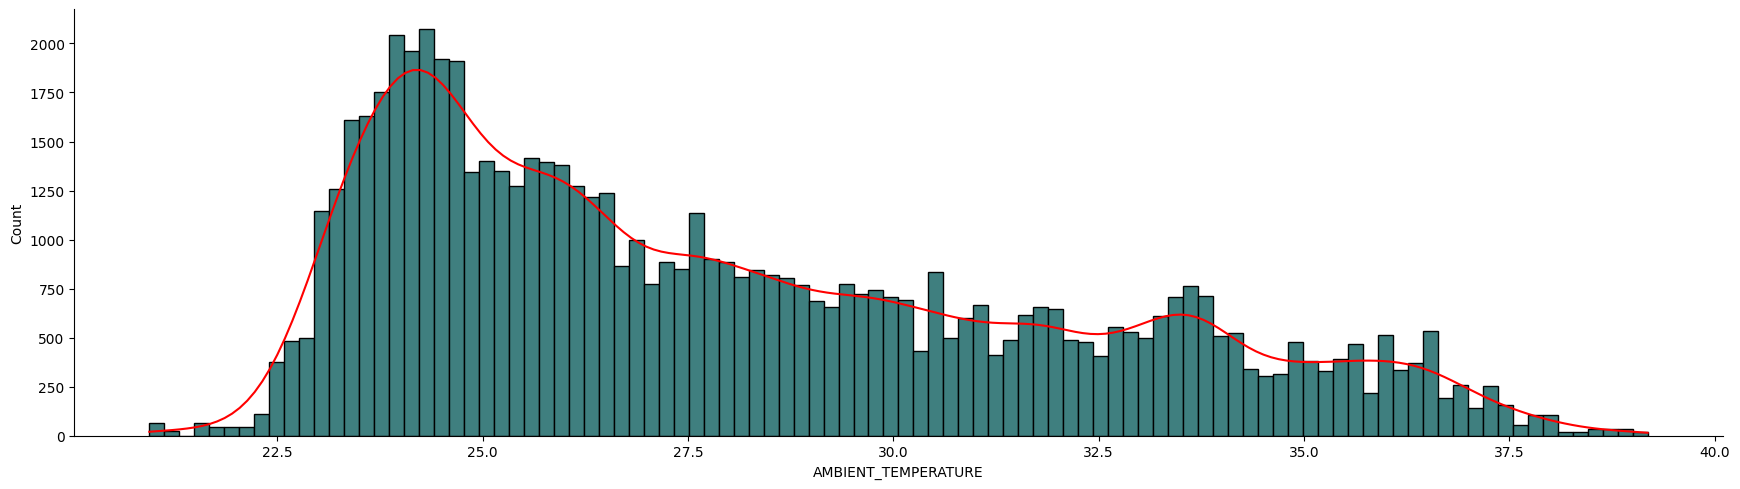

In [27]:
import seaborn as sns

sns.displot(df_solar, x='AMBIENT_TEMPERATURE', kde=True, bins=100, color='red', facecolor="#3F7F7F", height=5, aspect=3.5)

In [29]:
df_solar['date'].nunique()

34

C:\Users\tarun\AppData\Local\Temp\ipykernel_3056\2186064721.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  daily_dc = df_solar.groupby('date')['DC_POWER'].agg(sum)


Text(0.5, 1.0, 'Daily DC Power')

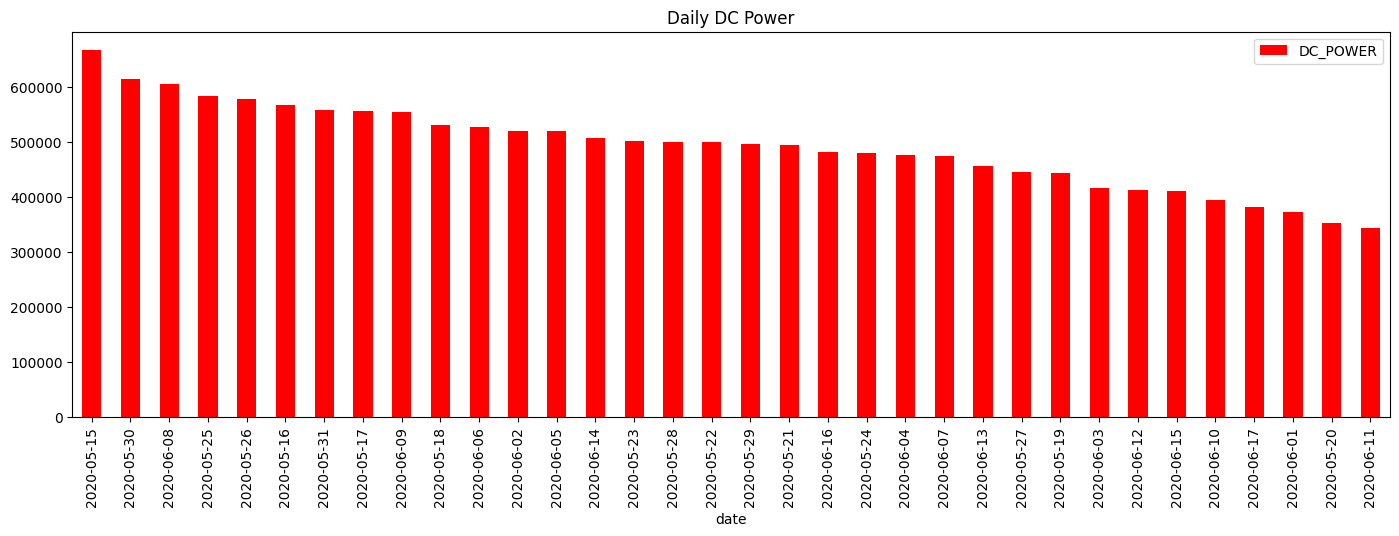

In [31]:
import matplotlib.pyplot as plt
daily_dc = df_solar.groupby('date')['DC_POWER'].agg(sum)
ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True, color='red')
plt.title('Daily DC Power')

In [32]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  int64         
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   date                 67698 non-null  object        
 10  time                 67698 non-null  object        
 11  day                  67698 non-null  int32         
 12  month                67698 non-null  int32         
 13  week                 67698 non-

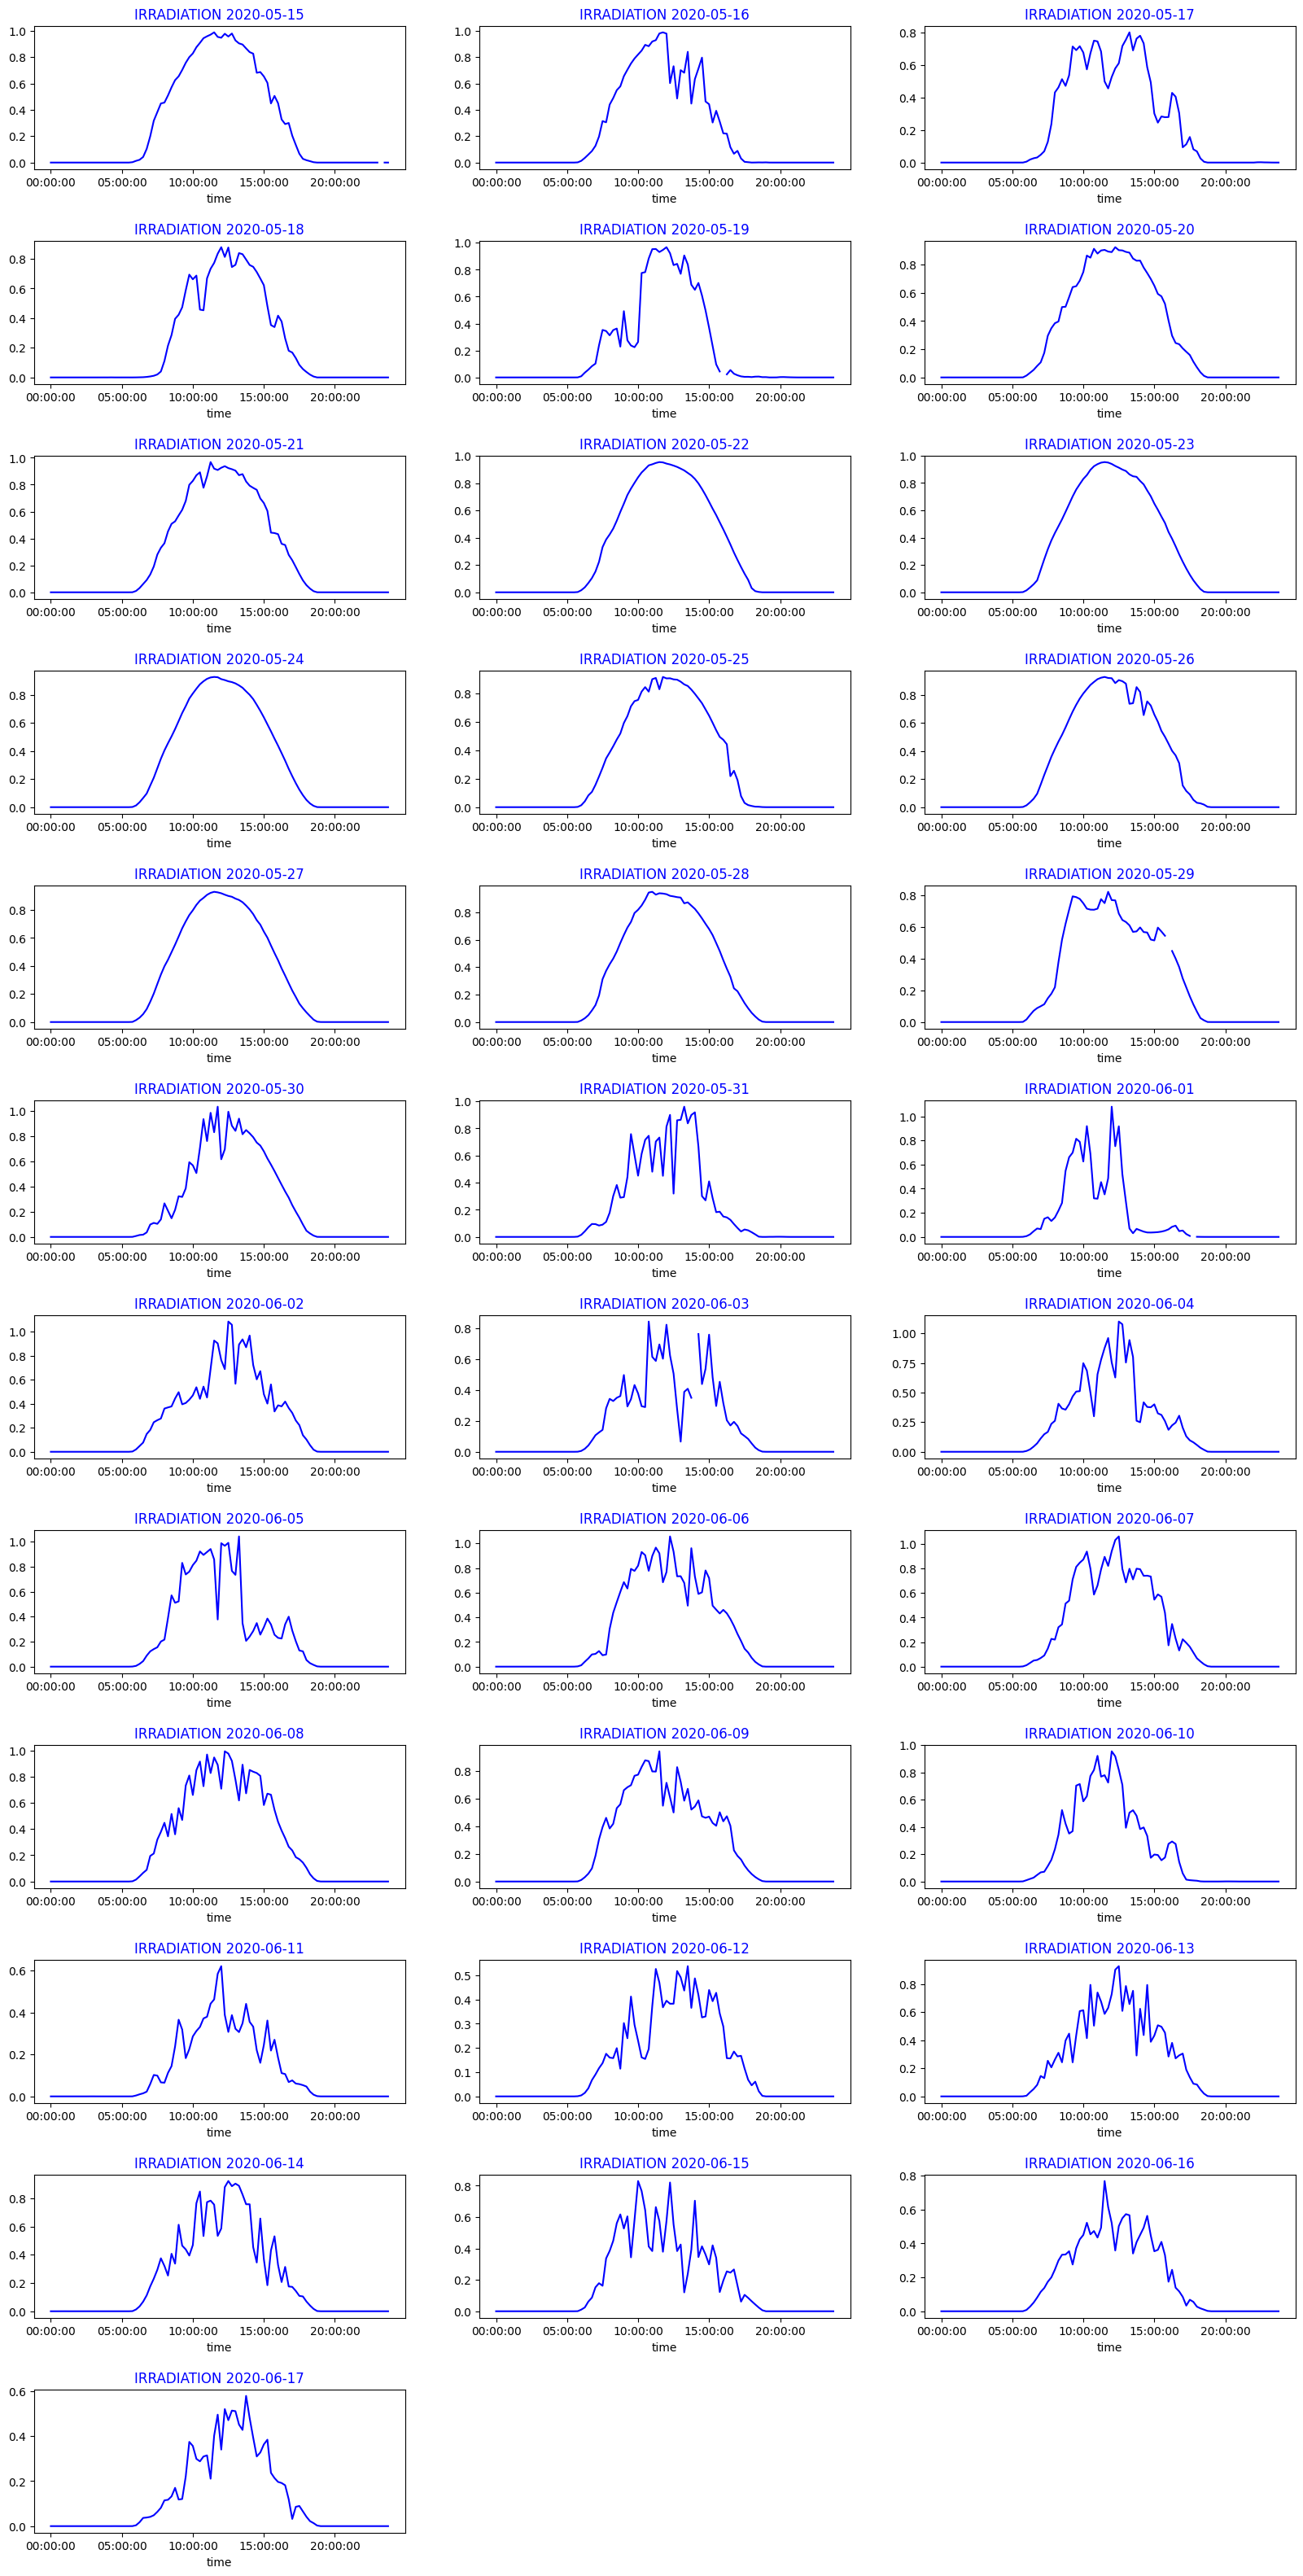

In [35]:
solar_irrad = df_solar.pivot_table(values='IRRADIATION', index='time', columns='date')

def daywise_plot(data=None, row=None, col=None, title='IRRADIATION'):
    cols=data.columns
    gp=plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row, col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]), color='blue')

daywise_plot(solar_irrad, row=12, col=3)

C:\Users\tarun\AppData\Local\Temp\ipykernel_3056\1967135121.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  daily_irrad = df_solar.groupby('date')['IRRADIATION'].agg(sum)


Text(0.5, 1.0, 'DAILY IRRADIATION')

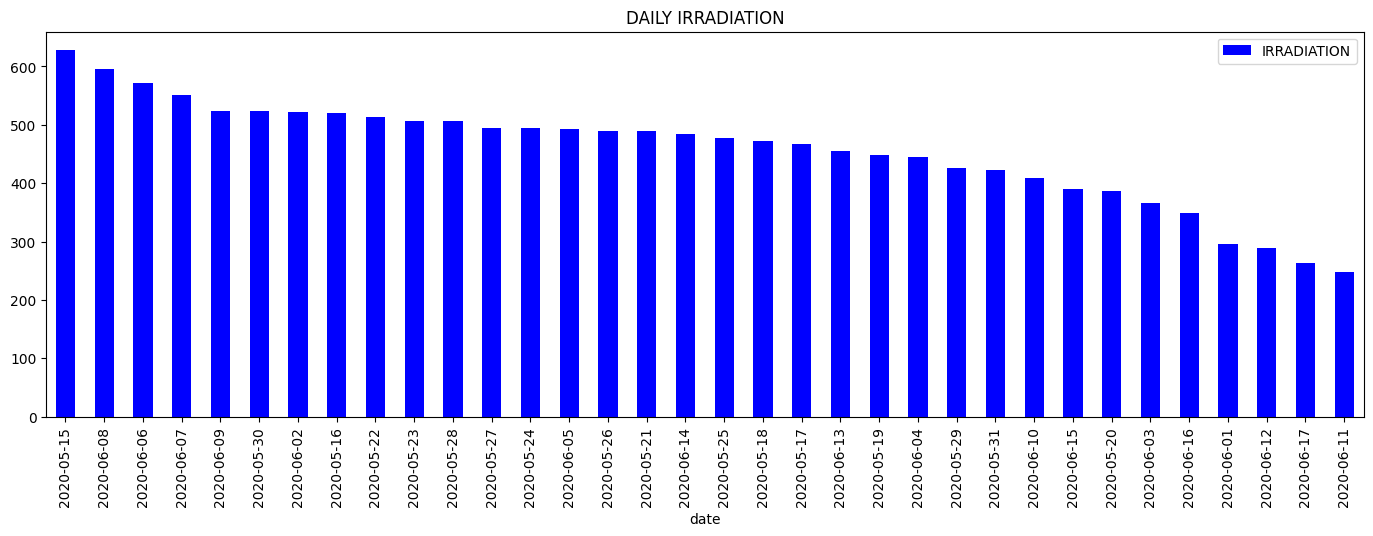

In [36]:
daily_irrad = df_solar.groupby('date')['IRRADIATION'].agg(sum)
daily_irrad.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='blue')
plt.title('DAILY IRRADIATION')

# Solar power prediction

In [37]:
df2 = df_solar.copy()
df2.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'date', 'time', 'day', 'month', 'week', 'hours',
       'minutes', 'total_mins_pass', 'date_str'],
      dtype='object')

In [38]:
X = df2[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [42]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=21)

# Model 1 - Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(xtrain, ytrain)
score = 100*lr_clf.score(xtest, ytest)
print(f'LR Model score = {score:4.4f}%')

LR Model score = 99.9994%


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
r2 = round(r2_score(ypred, ytest)*100, 2)

print('R2 score: ', r2)

R2 score:  100.0


In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(xtrain, ytrain)
ypred_rfr = rfr.predict(xtest)
r2_score_rfr = round(r2_score(ypred_rfr, ytest)*100, 2)

print('R2 SCORE RFR: ', r2_score_rfr)

R2 SCORE RFR:  100.0


In [47]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(xtrain, ytrain)
ypred_dt = dt.predict(xtest)

r2_dt = round(r2_score(ypred_dt, ytest)*100, 2)

print('R2 dt score: ', r2_dt)

R2 dt score:  100.0
